In [6]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from mpl_toolkits import mplot3d
from matplotlib import dates as date
import seaborn as sns; sns.set() 
plt.style.use("fivethirtyeight")

In [29]:
from sklearn.base import BaseEstimator,TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
        
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg=(x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    
    def fit(self,X,y=None):
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_=self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self,x):
        return self._gauss_basis(X[:,:,None],self.centers_,
                                self.width_,axis=1)
    
gauss_model=make_pipeline(GaussianFeatures(20),
                        LinearRegression())

gauss_model.fit(x[:,None],y)
yfit=gauss_model.predict(xfit[:,None])


In [33]:
def basis_plot(model,title=None):
    fig,ax=plt.subplots(2,sharex=True)
    model.fit(x[:,None],y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(x[:,None]))
    ax[0].set(xlabel="x",ylabel="y",ylim=(-1.5,1.5))
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0,10))

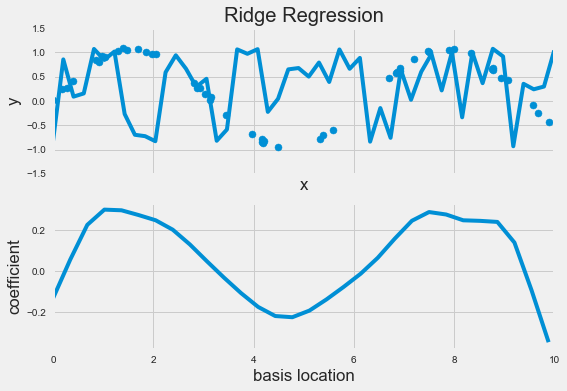

In [35]:
from sklearn.linear_model import Ridge
model=make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model,title="Ridge Regression")

In [230]:
from sklearn.linear_model import Lasso
model=make_pipeline(GaussianFeatures(30),Lasso(alpha=0.001))
basis_plot(model,title="Lasso Regression")

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])